# Linear Regression

### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random

### 1. Load Data

##### 1.1 From .csv

In [2]:
# data = pd.read_csv('CarPrice_Assignment.csv',delimiter = ',')

# print(data)
# headers = data[0,:]
# print(headers)
# data = data[1:,:]
# print(data[:5,:])

##### 1.2 From sklearn datasets

In [3]:
from sklearn.datasets import load_boston

##### 1.3 From .txt

In [4]:
# data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);
'''
data is imported as numpy array, do not forget to remove the header
'''
# data

'\ndata is imported as numpy array, do not forget to remove the header\n'

### 2. Extract X and y

##### 2.1 Pandas

In [5]:
# extract x
# col = ['enginesize','horsepower','peakrpm']
# X = data[col]
# print(X.iloc[:5,:])

# # extract y
# y = data['price'] 
# print(y.iloc[:5])

##### 2.2 Sklearn Datasets (Bunch)

In [6]:
boston = load_boston()
X = boston.data
y = boston.target
# print(X)
# print(y)

##### 2.3 Numpy

In [7]:
# Extract headers and data
# headers = raw_data[0,:];
# print(headers)
# data = np.array(raw_data[1:,:], dtype=float);
# print(data)

In [8]:
# # see headers
# headers = data[0,:]
# print(headers)

### 3. Shape Checking

In [9]:
# check number of samples
m = X.shape[0]
print("Number of samples: ", m)
# check number of features
n = X.shape[1]
print("Number of features: ", n)

# check number of y
assert m == y.shape[0]

Number of samples:  506
Number of features:  13


### 4. Cleaning data

##### 4.1 Check for missing data

In [10]:
#Pandas 
#Convert to DataFrame to check for missing data
df = pd.DataFrame(X)
print('Missing values for train data:\n------------------------\n', df.isnull().sum())

Missing values for train data:
------------------------
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


##### 4.2 Handling Missing Values

###### 4.2.1 Discrete

##### Yes and No

In [11]:
# print(data_train['Married'].value_counts())

# married = data_train['Married'].value_counts()
# print('Elements in Married variable', married.shape)
# print('Married ratio ', married[0]/sum(married.values))

# def fill_martial_status(data, yes_num_train, no_num_train):        
#     data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
#     data['Married'].fillna('No', inplace = True, limit = no_num_train)  

# fill_martial_status(data_train, 2, 1)
# print(data_train['Married'].value_counts()) 
# print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

##### Numeric

In [12]:
# print(data_train['Dependents'].value_counts())
# dependent = data_train['Dependents'].value_counts()

# print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
# print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
# print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
# print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

# def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
#     data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
#     data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
#     data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
#     data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
#     data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
#     data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
#     data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
#     data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

# fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

# print(data_train['Dependents'].value_counts())

# # Convert category value "3+" to "4"

# data_train['Dependents'].replace('3+', 4, inplace = True)
# data_test['Dependents'].replace('3+', 4, inplace = True)

##### 4.2.2 Continuous (filled with mean)

In [13]:
# print(data_train['LoanAmount'].value_counts())

# LoanAmt = data_train['LoanAmount'].value_counts()

# print('mean loan amount ', np.mean(data_train["LoanAmount"]))

# loan_amount_mean = np.mean(data_train["LoanAmount"])

# data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
# data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)
# data_train.isnull().sum()
# # data_test.isnull().sum()

#### Double Check

In [14]:
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


#### String to number conversion

In [15]:
# def convert_vals(col,col_name,answer1, answer2 ,answer3):
#     ixd_1 = np.where(data_train[col_name] == answer1)
#     ixd_0 = np.where(data_train[col_name]== answer2)
#     ixd_2 = np.where(data_train[col_name]== answer3)
#     for i in ixd_1:
#         data_train.iloc[i,col] = 1
#     for i in ixd_0:
#         data_train.iloc[i,col] = 0
#     for i in ixd_2:
#         data_train.iloc[i,col] = 2

# convert_vals(1,'Gender','Male','Female','')
# convert_vals(2,'Married','Yes','No','')
# convert_vals(4,'Education','Graduate','Not Graduate','')
# convert_vals(5,'Self_Employed','No','Yes','')
# convert_vals(11,'Property_Area','Semiurban','Rural','Urban')
# convert_vals(12,'Loan_Status','Y','N','')

# cols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

# X = data_train[cols]
# X = X.astype(float)
# X = np.array(X)
# # print(X)

# Y = data_train['Loan_Status']
# Y = Y.astype(float)
# Y = np.array(Y)

##### Delete everything that's missing

In [16]:
# df["Text"] = df['Title'].fillna('') + ' ' + df['Review Text'].fillna('')
# df = df[df['Text'] != ' ']

##### Replacing fancy stuff

In [17]:
# df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9 \n\.]|\.', '')
# df['Text'] = df['Text'].str.lower()
# df = df[['Text', 'Rating']]

#### Convert back to numpy

In [18]:
X = df.values
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


#### Plot

In [19]:
# plt.scatter(X[:,1], y)
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')
# plt.title('plot')
# plt.show()

### 5. Final prep

##### 5.1 Feature engineering

In [20]:
# No dummy
def x_polynomial(x, d):
    for i in range(1,d):
        a = np.concatenate((x,x**(i+1)), axis = 1)
    return a
X = x_polynomial(X,2)
print(X)
print(X.shape)

[[6.32000000e-03 1.80000000e+01 2.31000000e+00 ... 2.34090000e+02
  1.57529610e+05 2.48004000e+01]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 ... 3.16840000e+02
  1.57529610e+05 8.35396000e+01]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 ... 3.16840000e+02
  1.54315409e+05 1.62409000e+01]
 ...
 [6.07600000e-02 0.00000000e+00 1.19300000e+01 ... 4.41000000e+02
  1.57529610e+05 3.18096000e+01]
 [1.09590000e-01 0.00000000e+00 1.19300000e+01 ... 4.41000000e+02
  1.54802902e+05 4.19904000e+01]
 [4.74100000e-02 0.00000000e+00 1.19300000e+01 ... 4.41000000e+02
  1.57529610e+05 6.20944000e+01]]
(506, 26)


##### 5.2 Normalization/Standardization

###### 5.2.1 Sklearn

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X.shape)
# print(X)

(506, 26)


##### 5.2.2 Scratch

In [22]:
# X = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)
# print(X)

### 6. Spliting train and test

##### 6.1 Sklearn

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(354, 26) (354,)
shapes of X_test, y_test
(152, 26) (152,)


##### 6.2 Scratch

In [24]:
# Random index 
# import random
# m = X.shape[0]
# idx = np.arange(0,m)
# random.shuffle(idx)

# # Numpy
# X = X[idx,:]

# Pandas
# X = X.iloc[idx,:]

# X = X.reset_index()
# X.shape

In [25]:
import random
m, n = X.shape
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .7
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:];
X_test = X[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(354, 26) (354,)
shapes of X_test, y_test
(152, 26) (152,)


#### Addition of dummy

In [26]:
# add dummy at X_train
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)

# add dummy at X_test
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

print('shapes of X_train, y_train with DUMMY added')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test with DUMMY added')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train with DUMMY added
(354, 27) (354,)
shapes of X_test, y_test with DUMMY added
(152, 27) (152,)


# Linear Regression

### Step 1: Predict and calculate loss

#### Closed form

In [27]:
from numpy.linalg import inv
def closed_form(X, y):
    return inv(X.T @ X) @ X.T @ y

#### Batch

In [28]:
#yhat
def get_yhat(X, theta):
    return X @ theta

#MSE
# def cost(yhat, y):
#     return ((yhat - y)**2 / yhat.shape[0]).sum()

#loss = cost
def get_loss(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = ((yhat - y)**2 / yhat.shape[0]).sum()
    return loss_new

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

# for theta updating
# error = h_theta(X,theta) - y
def gradient(X,y,theta):
    grad = X.T.dot(get_yhat(X,theta)-y)
    return grad

def gradient_descent(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
    theta = theta_initial
    tol = 0.01    
    loss_history_train = []
    loss_history_test = []
    loss_old_train = np.inf
    iter_stop = 0  
    for i in range(max_iter):
        # calculate costs
        loss_new_train = get_loss(X_train,y_train,theta)
        loss_test = get_loss(X_test,y_test,theta)        
#         print(loss_new)
        
        # early stopping?
        if delta_loss(loss_new_train, loss_old_train,tol):
            diff = np.abs(loss_new_train - loss_old_train)
#             print(diff)
            iter_stop = i
            break
        loss_old_train = loss_new_train
#         print(loss_old.shape)
        
        if i%100 == 0:
            print("cost iter",i,':',loss_old_train)
        loss_history_train.append(loss_old_train)
        loss_history_test.append(loss_test)
        
        
        # cal grad to update theta
        grad = gradient(X_train,y_train,theta)
#         print(grad)
        
        # update theta
        theta = theta - alpha* grad
#         print('theta',theta)
        
    return loss_history_train,loss_history_test, theta, iter_stop,diff

#### Stochastic

In [29]:
# gradient descent Stochastic
def get_yhat(X, theta):
    return X @ theta

#loss = cost
def get_loss_single(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = (yhat - y)**2
    return loss_new

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

# for theta updating
# error = h_theta(X,theta) - y
def gradient(X,y,theta):
    grad = X.T.dot(get_yhat(X,theta)-y)
    return grad

def gradient_descent_stochastic(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
    theta = theta_initial
    tol = 0.01    
    loss_history_train = []
    loss_history_test = []
    loss_old_train = np.inf
    iter_stop = 0  
    for i in range(max_iter):
        #random number
        idx = np.random.randint(X_train.shape[0])
        idx_test = np.random.randint(X_test.shape[0])
        X_idx = X_train[idx,:].reshape(1,-1)
        X_test_idx = X_test[idx_test,:].reshape(1,-1)
#         print(y_train.shape,idx)
        y_idx = y_train[idx] #sometimes iloc
        y_test_idx = y_test[idx_test]
        
        # calculate costs
        loss_new_train = get_loss_single(X_idx,y_idx,theta)
        loss_test = get_loss_single(X_test_idx,y_test_idx,theta)
        
        # early stopping?
        if delta_loss(loss_new_train, loss_old_train,tol):
            diff = np.abs(loss_new_train - loss_old_train)
#             print(diff)
            iter_stop = i
            break
        loss_old_train = loss_new_train
        if i%100 == 0:
            print("cost iter",i,':',loss_old_train)
#             #append less
#             loss_history_train.append(loss_old_train)
#             loss_history_test.append(loss_test)
        loss_history_train.append(loss_old_train)
        loss_history_test.append(loss_test)
        
        # cal grad to update theta
        grad = gradient(X_idx,y_idx,theta)
#         print(grad)
        
        # update theta
        theta = theta - alpha* grad
#         print('theta',theta)
        
    return loss_history_train,loss_history_test, theta, iter_stop, diff

#### Mini batch

In [30]:
# gradient descent Stochastic
def get_yhat(X, theta):
    return X @ theta

#loss = cost
def get_loss_mini(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = ((yhat - y)**2/ yhat.shape[0]).sum()
    return loss_new

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

# for theta updating
# error = h_theta(X,theta) - y
def gradient(X,y,theta):
    grad = X.T.dot(get_yhat(X,theta)-y)
    return grad

def gradient_descent_mini(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
    theta = theta_initial
    tol = 0.01    
    loss_history_train = []
    loss_history_test = []
    loss_old_train = np.inf
    iter_stop = 0  
    batch_train = int(0.1*X_train.shape[0])
    batch_test = int(0.1*X_test.shape[0])
    # Random index
    idx = np.random.randint(X_train.shape[0])
    idx_test = np.random.randint(X_test.shape[0])
    for i in range(max_iter):
        X_train_batch = X_train[idx:idx+batch_train]
        y_train_batch = y_train[idx:idx+batch_train]
        X_test_batch = X_test[idx_test:idx_test+batch_test]
        y_test_batch = y_test[idx_test:idx_test+batch_test]  
 
        loss_new_train = get_loss_mini(X_train_batch,y_train_batch,theta)
        loss_test = get_loss_mini(X_test_batch,y_test_batch,theta)
        
        # early stopping?
        if delta_loss(loss_new_train, loss_old_train,tol):
            diff = np.abs(loss_new_train - loss_old_train)
#             print(diff)
            iter_stop = i
            break
        loss_old_train = loss_new_train
        if i%100 == 0:
            print("cost iter",i,':',loss_old_train)
#             #append less
#             loss_history_train.append(loss_old_train)
#             loss_history_test.append(loss_test)
        loss_history_train.append(loss_old_train)
        loss_history_test.append(loss_test)
        
        # cal grad to update theta
        grad = gradient(X_train_batch,y_train_batch,theta)
        
        # update theta
        theta = theta - alpha* grad
        
    return loss_history_train,loss_history_test, theta, iter_stop, diff

### Closed form

In [31]:
from numpy.linalg import inv
def closed_form(X, y):
    return inv(X.T @ X) @ X.T @ y

### Step 2: Initializing Theta

In [32]:
theta_initial = np.zeros(X_train.shape[1])
# theta_initial = theta_initial.reshape(-1,1)
# check shape of theta
print("="*30)
print("Shape of theta: ", theta_initial.shape)

# initial theta
print("="*30)
print("Initial theta: ", theta_initial)

Shape of theta:  (27,)
Initial theta:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


### Step 3: Define alpha and number of iterations

#### Batch

In [33]:
alpha  = 0.00001
max_iter = 10000

In [34]:
cost_history_train,cost_history_test,theta, iter_stop,diff = gradient_descent(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha ,max_iter = max_iter)


cost iter 0 : 575.9587570621469
cost iter 100 : 282.467564017091
cost iter 200 : 150.95190741595695
cost iter 300 : 86.57645757272238
cost iter 400 : 54.727586149045315
cost iter 500 : 38.84703366209883
cost iter 600 : 30.853325687294905
cost iter 700 : 26.77008261270149
cost iter 800 : 24.632862618751467


#### Stochastic

In [35]:
alpha_sto  = 0.001 
max_iter_sto = 100000

In [36]:
cost_history_train_sto,cost_history_test_sto,theta_sto,iter_stop_sto,diff_sto = gradient_descent_stochastic(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha_sto ,max_iter = max_iter_sto)

cost iter 0 : [171.61]
cost iter 100 : [434.32949383]
cost iter 200 : [152.90414209]
cost iter 300 : [175.71126531]
cost iter 400 : [561.69950244]
cost iter 500 : [404.17480564]
cost iter 600 : [99.7432787]
cost iter 700 : [36.43794969]
cost iter 800 : [123.62255365]
cost iter 900 : [43.60734141]
cost iter 1000 : [72.20010374]
cost iter 1100 : [32.52725463]
cost iter 1200 : [128.48966489]
cost iter 1300 : [33.75065374]
cost iter 1400 : [53.61108083]
cost iter 1500 : [20.81890161]


#### Mini Batch

In [37]:
alpha_mini  = 0.001
max_iter_mini = 100000

In [38]:
cost_history_train_mini,cost_history_test_mini,theta_mini,iter_stop_mini,diff_mini = gradient_descent_mini(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha_mini ,max_iter = max_iter_mini)

cost iter 0 : 409.76969696969695
cost iter 100 : 10.960780857723078
cost iter 200 : 4.85720955201867


### Step 3: Visualize the loss (cost_history)

#### Batch

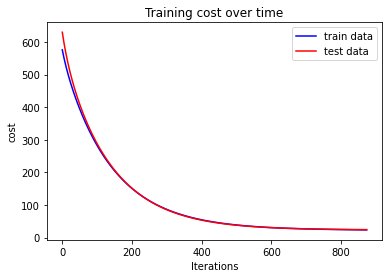

In [39]:
plt.plot(cost_history_train,'b', label="train data")
plt.plot(cost_history_test,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

#### Stochastic

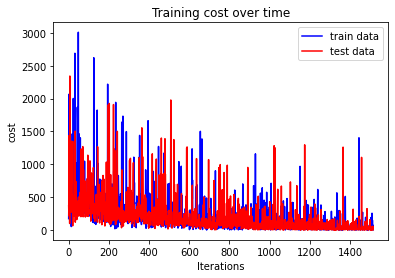

In [40]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train_sto,'b', label="train data")
plt.plot(cost_history_test_sto,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

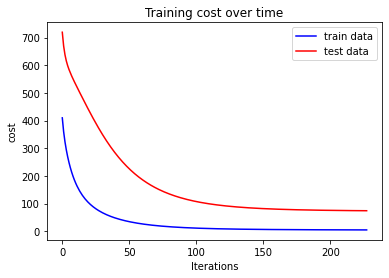

In [41]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train_mini,'b', label="train data")
plt.plot(cost_history_test_mini,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

### Step 4: Answers

#### Batch

In [42]:
# theta, iter
print("="*30)
print("Optimal Theta: ", theta)
print("="*30)
print("Cost with optimized theta: ", cost_history_train[-1])
print("="*30)
print("Number of iterations: ", iter_stop)
print("="*30)
print("diff_loss:", diff)

Optimal Theta:  [21.58294151 -0.39530589  0.27551443 -0.37905161  0.55984466 -0.49796533
  1.33252696 -0.45816694 -1.20711001  0.33578134 -0.27432465 -0.93076858
  0.56890497 -2.16886854 -0.38773726  0.28305738  0.07668422  0.55984466
 -0.6591273   2.30609989 -0.25511667 -1.00140142  0.309876   -0.03882896
 -0.80054561  0.33609774 -0.41653676]
Cost with optimized theta:  23.710253503646612
Number of iterations:  875
diff_loss: 0.009958452413059149


#### Stochastic

In [43]:
# theta, iter
print("="*30)
print("Optimal Theta: ", theta_sto)
print("="*30)
print("Cost with optimized theta: ", cost_history_train_sto[-1])
print("="*30)
print("Number of iterations: ", iter_stop_sto)
print("="*30)
print("diff_loss:", diff_sto)

Optimal Theta:  [ 1.75855116e+01 -4.09899879e-01  4.60204962e-01 -2.94109780e-01
  5.83744172e-01 -3.87366929e-01  1.15222323e+00 -2.05143007e-01
 -7.66859186e-01  1.11049339e-01 -1.65233891e-01 -7.62431053e-01
  3.42854237e-01 -1.60514384e+00 -2.65406458e-01  4.38367469e-01
  2.81397739e-02  5.83744172e-01 -4.25220328e-01  1.61229713e+00
 -9.89282315e-02 -7.94922137e-01  1.26994537e-01 -1.29408546e-02
 -6.90127258e-01  2.80099595e-01 -8.68143333e-01]
Cost with optimized theta:  [0.00662193]
Number of iterations:  1515
diff_loss: [0.00430446]


#### Mini batch

In [44]:
# theta, iter
print("="*30)
print("Optimal Theta: ", theta_mini)
print("="*30)
print("Cost with optimized theta: ", cost_history_train_mini[-1])
print("="*30)
print("Number of iterations: ", iter_stop_mini)
print("="*30)
print("diff_loss:", diff_mini)

Optimal Theta:  [19.18399607 -3.85316348  0.23073188 -0.86160439  0.33046694  0.37838321
  1.98507585 -0.93744893 -1.28820364  1.0549566  -2.02282986  0.11061007
  0.27733792  0.67049042 -2.81292588  1.072258   -0.33905635  0.33046694
  0.19875949  1.4330186  -1.18785556 -0.8259282   1.16496458 -0.97368653
 -0.07571579  0.83721368 -0.20339216]
Cost with optimized theta:  4.521537240664584
Number of iterations:  228
diff_loss: 0.009916262894272165


#### Closed form

In [45]:
theta_cf = closed_form(X_train, y_train)
print("="*30)
print("Optimal Theta: ", theta_cf)

Optimal Theta:  [-1.42508098e+13 -6.43252481e+13  9.61734410e+13  2.06265318e+14
 -3.22382798e+15 -3.07746449e+01 -7.77330576e+00 -8.31242138e-01
 -4.27580342e+00  8.82225035e+00 -9.27923841e+00 -2.34740216e+01
 -5.11403478e-03 -8.15706895e+00  1.85564559e+00  5.19619506e-01
  4.76218628e+00  3.22382798e+15 -2.39119567e+01  1.59789440e+01
  5.13404170e-02  3.23409673e+00 -1.65903145e+00  5.99781619e-02
  2.76215279e+01 -1.88193852e+00  4.51384822e+00]


### Step 5: Accuracy

#### 5.1 From Scratch

In [46]:
def get_rmse(X,y,theta):
    y_pred = get_yhat(X,theta)
    return np.sqrt(np.dot((y - y_pred).T, y - y_pred) / y_pred.shape[0])

rmse_train = get_rmse(X_train,y_train,theta)
rmse_test = get_rmse(X_test,y_test,theta)

def get_mse(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = ((yhat - y)**2 / yhat.shape[0]).sum()
    return loss_new
mse_train = get_mse(X_train,y_train,theta)
mse_test = get_mse(X_test,y_test,theta)

def r2_score(X,y,theta):
    return 1 - np.square(y - get_yhat(X,theta)).sum() / np.square(y - y.mean()).sum()

r2_score_train = r2_score(X_train,y_train,theta)
r2_score_test = r2_score(X_test,y_test,theta)


def get_adjusted_rsqrt(X,y,theta):
    n = X.shape[0]
    p = X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(X,y,theta)*(n-1)/(n-p-1))
    return adjusted_rsqrt

adjusted_rsqrt_train = get_adjusted_rsqrt(X_train,y_train,theta)
adjusted_rsqrt_test = get_adjusted_rsqrt(X_test,y_test,theta)

print("="*30)
print(f"rMSE train = {rmse_train:.2f}")
print(f"MSE train = {mse_train:.2f}")
print(f"r2 train = {r2_score_train:.2f}")
print(f"adjusted rsqrt train = {adjusted_rsqrt_train:.2f}")
print("="*30)
print(f"rMSE test = {rmse_test:.2f}")
print(f"MSE test = {mse_test:.2f}")
print(f"r2 test = {r2_score_test:.2f}")
print(f"adjusted rsqrt test = {adjusted_rsqrt_test:.2f}")

rMSE train = 4.87
MSE train = 23.70
r2 train = 0.72
adjusted rsqrt train = 0.78
rMSE test = 4.95
MSE test = 24.55
r2 test = 0.70
adjusted rsqrt test = 0.85


#### 5.2 Sklearn MSE

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
def MSE_R2(X_train,y_train,X_test,y_test):
    y_pred_train = get_yhat(X_train,theta)
    y_pred_test = get_yhat(X_test,theta)
    MSE_sklearn_train = mean_squared_error(y_train, y_pred_train)
    rmse_sklearn_train = np.sqrt(MSE_sklearn_train)
    r2_score_sklearn_train = r2_score(y_train, y_pred_train)
    MSE_sklearn_test = mean_squared_error(y_test, y_pred_test)
    rmse_sklearn_test = np.sqrt(MSE_sklearn_test)
    r2_score_sklearn_test = r2_score(y_test, y_pred_test)
    return MSE_sklearn_train, r2_score_sklearn_train,rmse_sklearn_train, MSE_sklearn_test,rmse_sklearn_test, r2_score_sklearn_test

MSE_sklearn_train, r2_score_sklearn_train,rMSE_sklearn_train, MSE_sklearn_test,rMSE_sklearn_test, r2_score_sklearn_test = MSE_R2(X_train,y_train,X_test,y_test)
print("="*30)
print(f"MSE train = {MSE_sklearn_train:.2f}")
print(f"rMSE train = {rMSE_sklearn_train:.2f}")
print(f"r2 train = {r2_score_sklearn_train:.2f}")
print("="*30)
print(f"MSE test = {MSE_sklearn_test:.2f}")
print(f"rMSE test = {rMSE_sklearn_test:.2f}")
print(f"r2 test = {r2_score_sklearn_test:.2f}")

MSE train = 23.70
rMSE train = 4.87
r2 train = 0.72
MSE test = 24.55
rMSE test = 4.95
r2 test = 0.70


In [48]:
# # Plot X, y, and the two regression models

# def get_predictions(x, theta):
#     x = np.array([x]).T
# #     print(x)
#     x = np.insert(x, 0, 1, axis=1)
#     while(x.shape[1] < theta.shape[0]):
#         x = np.insert(x, x.shape[1], x[:,1] * x[:,-1], axis=1)
# #         print(x)
# #     print(x[:5,:])
#     y = get_yhat(x, theta)
#     return y

# x_series = np.linspace(-2, 10, 1000)
# y_series = get_predictions(x_series, theta)
# # print(y_series)
# plt.plot(X_train, y_train, 'c.')
# plt.plot(x_series, y_series, '-', label='degree 2 ' + ' (test accuracy ' + str(r2_score_test) + ')')
# a = max(y_series)
# print(a)
# plt.ylim(-10, 60)
# plt.legend()
